# Netflix Titles Analysis: Data Preprocessing, Clustering, and AutoML

In [1]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()

c:\Users\Gymnasiet\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [2]:
df = df.dropna()

In [3]:
df.loc[:,'date_added'] = df['date_added'].apply(lambda x: x.strip())
df.loc[:,"date"] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
## add new features in the dataset
df['date_added']


df.loc[:,'year'] = df['date'].dt.year
df.loc[:,'month'] = df['date'].dt.month

df.loc[:,'season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df.loc[:,'duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

df.head()




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month,season_count
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021,9,
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021,9,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021,9,
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021,9,
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,2021,9,


In [32]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month,season_count
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021,9,
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021,9,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021,9,
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021,9,
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,2021,9,
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...,2021-09-20,2021,9,
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021-09-19,2021,9,
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021-09-19,2021,9,
38,s39,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,2021-09-16,2021,9,
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,2021-09-16,2021,9,


In [48]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gymnasiet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gymnasiet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

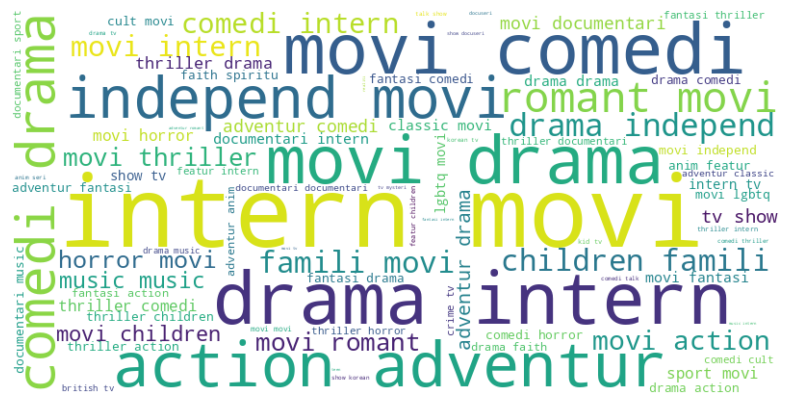

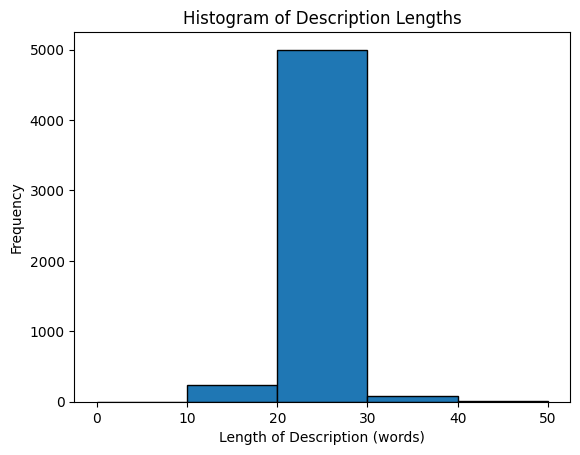

                              title  \
7                           Sankofa   
8     The Great British Baking Show   
9                      The Starling   
12                     Je Suis Karl   
24                            Jeans   
...                             ...   
8801                        Zinzana   
8802                         Zodiac   
8804                     Zombieland   
8805                           Zoom   
8806                         Zubaan   

                                             listed_in  \
7     Dramas, Independent Movies, International Movies   
8                         British TV Shows, Reality TV   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
24     Comedies, International Movies, Romantic Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804     

7       drama independ movi intern movi
8            british tv show realiti tv
9                          comedi drama
12                    drama intern movi
24       comedi intern movi romant movi
                     ...               
8801         drama intern movi thriller
8802           cult movi drama thriller
8804                 comedi horror movi
8805        children famili movi comedi
8806      drama intern movi music music
Name: processed_description, Length: 5332, dtype: object

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler



# Preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens)

df['processed_description'] = df['listed_in'].apply(preprocess_text)

# Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_description'])

# Display word cloud
text = ' '.join(df['processed_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Length of descriptions
df['description_length'] = df['description'].apply(lambda x: len(x.split()))

# Plot histogram of description lengths
plt.hist(df['description_length'], bins=range(0, max(df['description_length']) + 10, 10), edgecolor='black')
plt.xlabel('Length of Description (words)')
plt.ylabel('Frequency')
plt.title('Histogram of Description Lengths')
plt.show()

# Print processed DataFrame
print(df[['title', 'listed_in', 'processed_description']])
df['processed_description']


In [5]:
import matplotlib.pyplot as plt

def addlabels( x, y, Flag):
        if Flag:
            for index, value in enumerate(y):
                plt.text(x[index], value + 0.1, str(value), ha='center', va='bottom') 

def plot_histogram( x, y, color, xlabel, ylabel, title, rotation, Flag = False):
        plt.bar(x, y, color=color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        addlabels(x,y,Flag)
        plt.xticks(x, rotation=rotation)
        plt.show()

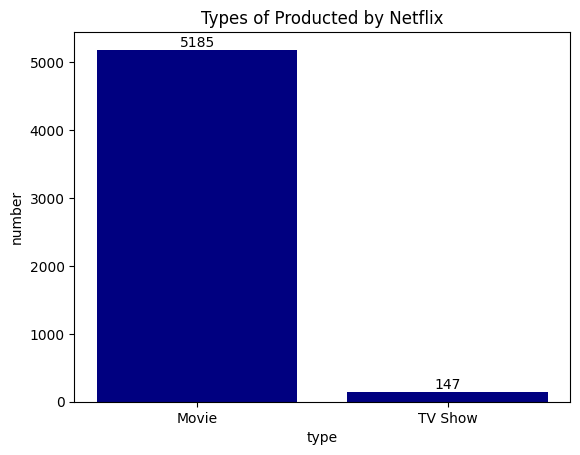

In [6]:
netflix_type = df['type'].value_counts()

plot_histogram( x = netflix_type.index,
                y = netflix_type.values,
                color = 'navy',
                xlabel = 'type', 
                ylabel = 'number', 
                title = 'Types of Producted by Netflix', 
                rotation = 0, 
                Flag = True)

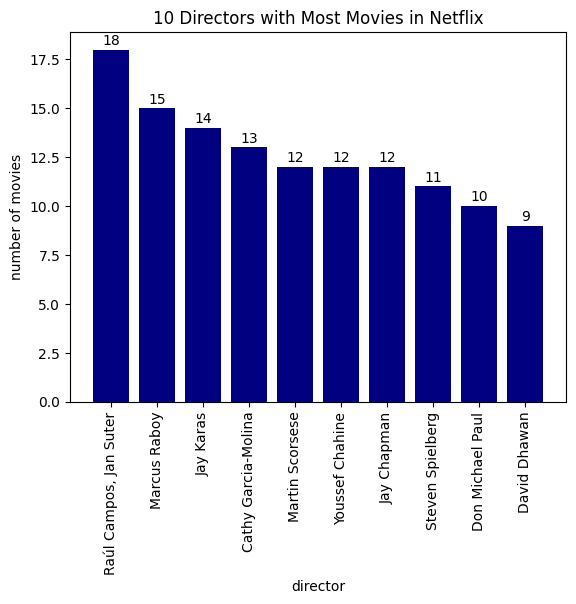

In [10]:
Netflix_director = df['director'].value_counts()

plot_histogram( x = Netflix_director.index[0:10],
                y = Netflix_director.values[0:10],
                color = 'navy',
                xlabel = 'director', 
                ylabel = 'number of movies', 
                title = '10 Directors with Most Movies in Netflix', 
                rotation = 90, 
                Flag = True)

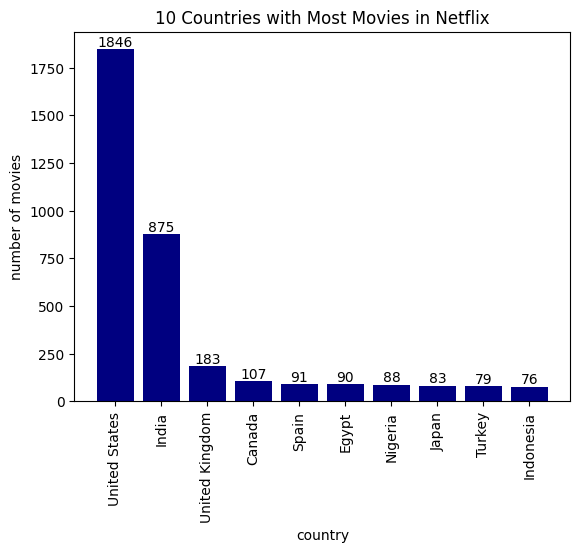

In [11]:
Netflix_country = df['country'].value_counts()
plot_histogram( x = Netflix_country.index[0:10],
                y = Netflix_country.values[0:10],
                color = 'navy',
                xlabel = 'country', 
                ylabel = 'number of movies', 
                title = '10 Countries with Most Movies in Netflix', 
                rotation = 90, 
                Flag = True)

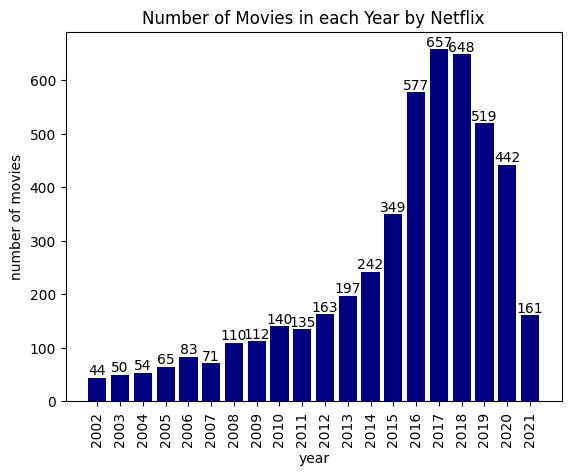

In [15]:
netflix_year = df['release_year'].value_counts()
plot_histogram( x = netflix_year.index[0:20],
                y = netflix_year.values[0:20],
                color = 'navy',
                xlabel = 'year', 
                ylabel = 'number of movies', 
                title = 'Number of Movies in each Year by Netflix', 
                rotation = 90, 
                Flag = True)

In [39]:

def extract_words(text):
    # Remove commas and split by space
    return [word.strip().lower() for word in text.replace(',', '').split()]

df['listed_in'].value_counts()

listed_in
Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: count, Length: 335, dtype: int64